# **Exploratory Data Analysis Lab**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


Import the pandas module.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


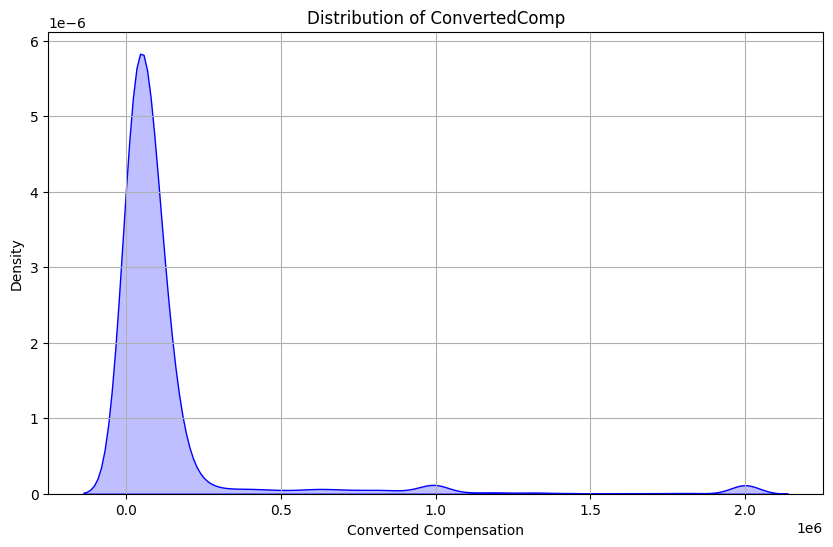

In [3]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'], fill=True, color='blue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.grid()
plt.show()

Plot the histogram for the column `ConvertedComp`.


(array([4.56388206e-06, 1.12455112e-07, 5.43375543e-08, 5.90625591e-08,
        4.67775468e-08, 6.18975619e-08, 1.60650161e-08, 7.08750709e-09,
        7.08750709e-09, 7.13475713e-08]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

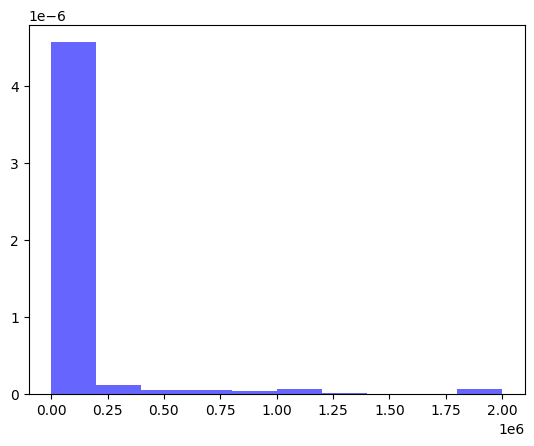

In [4]:
plt.hist(df['ConvertedComp'],bins=10,density=True,alpha=0.6, color='blue')

What is the median of the column `ConvertedComp`?


In [21]:
df['ConvertedComp'].median()

np.float64(57745.0)

How many responders identified themselves only as a **Man**?


In [8]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:
W_df = df[df['Gender'] == 'Woman']
median_converted_comp = W_df['ConvertedComp'].median()
print(f"The median ConvertedComp for responders identified as 'Woman' is: {median_converted_comp}")

The median ConvertedComp for responders identified as 'Woman' is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [13]:
five_number_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Display the five-number summary
summary = {
    'Minimum': five_number_summary['min'],
    'Q1 (25th Percentile)': five_number_summary['25%'],
    'Median (50th Percentile)': five_number_summary['50%'],
    'Q3 (75th Percentile)': five_number_summary['75%'],
    'Maximum': five_number_summary['max']
}

print(five_number_summary)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


(array([2.250e+02, 1.869e+03, 2.969e+03, 2.368e+03, 1.579e+03, 9.780e+02,
        5.780e+02, 2.640e+02, 1.590e+02, 6.600e+01, 3.500e+01, 1.400e+01,
        3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([16.  , 20.15, 24.3 , 28.45, 32.6 , 36.75, 40.9 , 45.05, 49.2 ,
        53.35, 57.5 , 61.65, 65.8 , 69.95, 74.1 , 78.25, 82.4 , 86.55,
        90.7 , 94.85, 99.  ]),
 <BarContainer object of 20 artists>)

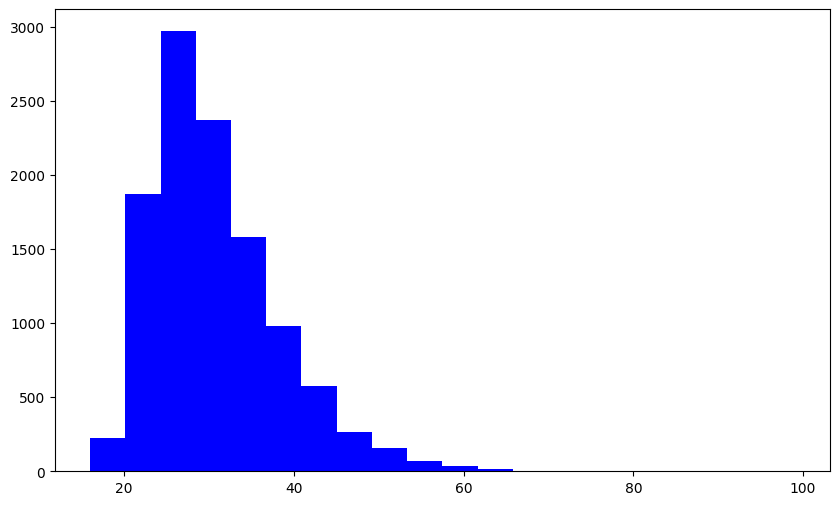

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'],bins=20,density=False,color='blue')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


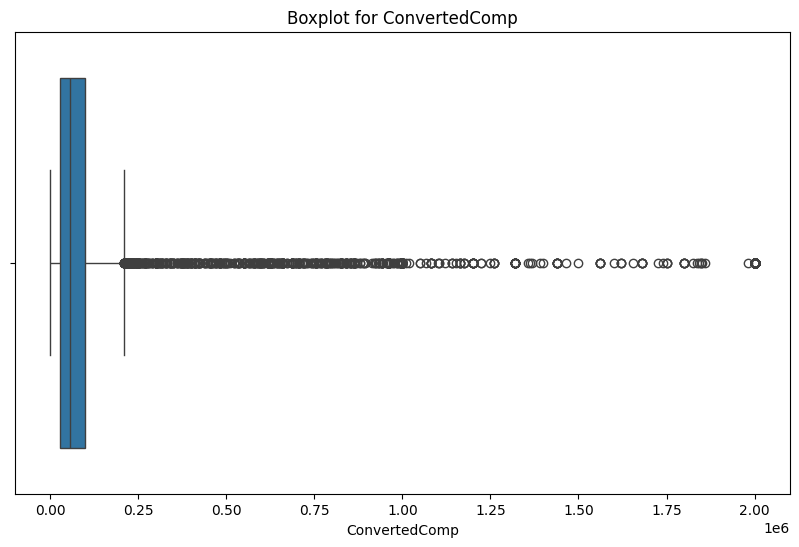

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ConvertedComp')
plt.title('Boxplot for ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [9]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"Inter Quartile Range (IQR): {IQR}")

Inter Quartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [11]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [12]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f"New DataFrame shape without outliers: {df_no_outliers.shape}")

New DataFrame shape without outliers: (9703, 85)


In [23]:
df_no_outliers['ConvertedComp'].mean()

np.float64(59883.20838915799)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [17]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Find the correlation of 'Age' with all other numerical columns
correlation_matrix = numerical_df.corr()

# Extract the correlation of 'Age' with other columns
age_correlation = correlation_matrix['Age']

# Display the correlation of Age with all other numerical columns
print(age_correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64
